$\textbf{Voltage and Bowl Calibration}$

$\text{After the cropping the dataset we can do the voltage and bowl correction to clibrate the data.}$

In [5]:
%matplotlib notebook
import os
import os.path as path
import numpy as np
from IPython.display import display

# Local module and scripts
from pyccapt.calibration.calibration_tools import variables, tools, data_tools, data_loadcrop
from pyccapt.calibration.calibration_tools import widgets as wd
from pyccapt.calibration.mc import mc_tools



In [6]:
# flightPathLength = 110 # mm 
# # The initial value for t_0
# t0 = 51.74 # ns

# dataset name
# AL_data_b
# OLO_AL_6_data
# OLO_W_6_data
# OLO_Ni_8_data
# X6Cr17_2V30Min_5_data
# data_1029_Jun-27-2022_15-53_Pd
# data_115_Jul-27-2022_17-44_Powersweep3
# SS-420-1_data
# data_1029_Jun-27-2022_15-53_Pd

In [7]:
tdc, pulse_mode, dataset, flightPathLength_d, t0_d = wd.dataset_tdc_selection()
display(tdc, pulse_mode, dataset, flightPathLength_d, t0_d)

Dropdown(description='TDC model:', options=('surface_concept', 'roentdec'), value='surface_concept')

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

Text(value='OLO_AL_6_data', description='Dataset:', placeholder='Paste ticket description here!')

Text(value='110', description='Flight path length:', placeholder='Flight path length')

Text(value='51.74', description='t0:', placeholder='T_0 of the instrument')

In [8]:
tdc_model = tdc.value
pulse_mode_ini = pulse_mode.value

dataset_name = dataset.value

flightPathLength = float(flightPathLength_d.value) # mm 
# The initial value for t_0
t0 = float(t0_d.value) # ns

p = path.abspath(path.join("", "../../../.."))

path_main = os.path.join(p, 'tests//data')
filename_main = path_main + '//' + dataset_name + '.h5'

variables.init()

variables.path = os.path.join(p, 'tests//results//load_crop')
variables.result_path = os.path.join(p, 'tests/results/mc_vol_bowl_calibratin/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
        
filename = variables.path + '//' + dataset_name + '//' + dataset_name + '_cropped' + '.h5'



head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)




In [9]:
data

dld/high_voltage  dld/pulse_voltage  dld/start_counter       dld/t  \
0             5267.498047        5267.498047            55251.0  622.754406   
1             5267.498047        5267.498047            55287.0  638.987292   
2             5267.498047        5267.498047            55309.0  623.385342   
3             5267.498047        5267.498047            56063.0  628.576848   
4             5267.498047        5267.498047            56440.0  634.749048   
...                   ...                ...                ...         ...   
1882844       5712.204590        5712.204590            43305.0  601.762068   
1882845       5712.204590        5712.204590            43628.0  621.602262   
1882846       5712.204590        5712.204590            44204.0  604.141794   
1882847       5712.204590        5712.204590            44353.0  602.152974   
1882848       5712.204590        5712.204590            44748.0  601.624908   

             dld/x      dld/y  
0         3.279184   4.170612  
1        21.203265 -21.457959  
2         5.953469   6.813061  
3        17.955918 -11.620408  
4       -21.903673   0.159184  
...            ...        ...  
1882844   2.069388  -6.335510  
1882845  29.130612  16.937143  
1882846   6.240000  -5.762449  
1882847   1.146122   6.685714  
1882848  10.951837   2.164898  

[1882849 rows x 6 columns]

In [60]:
# t0
dld_t = data['t (ns)'].to_numpy()
dld_t = dld_t - t0

In [61]:
# Remove negative and zero TOF
threshold = t0 + 20
dld_t_mask = data['t (ns)'].to_numpy()
dld_t_mask = (dld_t < threshold)
data.drop(np.where(dld_t_mask)[0], inplace=True)
data.reset_index(inplace=True, drop=True)

In [62]:
# exctract needed data from Pandas data frame as an numpy array
dld_highVoltage = data['high_voltage (V)'].to_numpy()
if pulse_mode_ini == 'voltage':
    dld_pulseVoltage = data['pulse (V)'].to_numpy()
elif pulse_mode_ini == 'laser':
    dld_pulseVoltage = data['pulse (deg)'].to_numpy()
dld_t = data['t (ns)'].to_numpy()
dld_x = data['x (mm)'].to_numpy()
dld_y = data['y (mm)'].to_numpy()

10-21-2022 11:36:33 | INFO | Selected Mode = count
10-21-2022 11:36:33 | INFO | Selected Mode = count
10-21-2022 11:36:33 | INFO | Selected Mode = count
10-21-2022 11:36:33 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


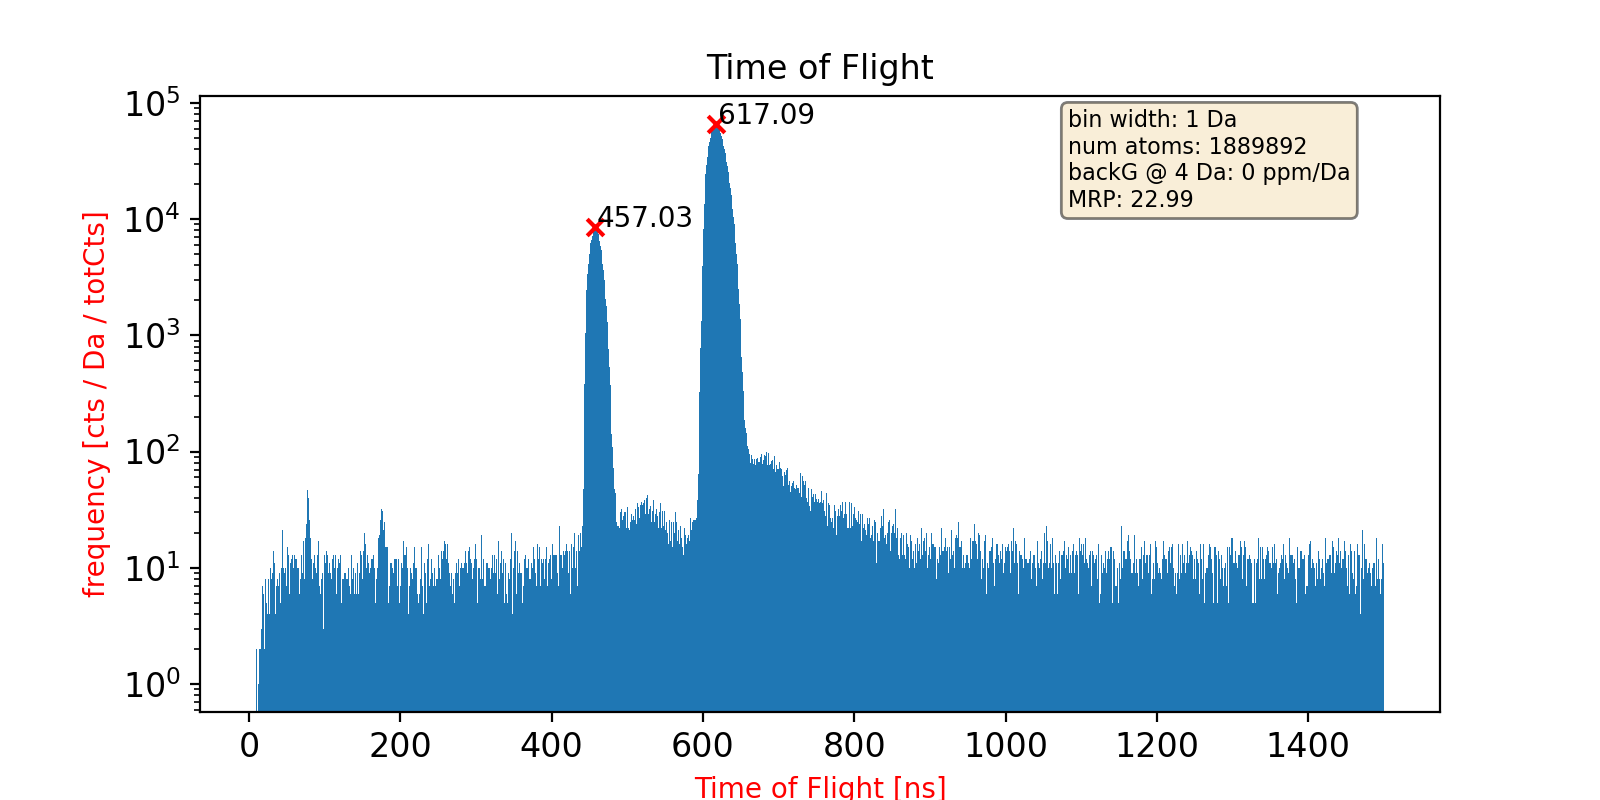

In [63]:
max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof, index_max_tof = tools.massSpecPlot(dld_t[dld_t < 1500], 1, distance=100, percent=50, prominence=100, plot=True, label='tof')

$\text{Plot the m/c. It is possible to modify the peak selection algorithm by seting different value for prominance and distance variable in massSpecPlot function.}$

10-21-2022 11:36:38 | INFO | Selected Mode = count
10-21-2022 11:36:38 | INFO | Selected Mode = count
10-21-2022 11:36:38 | INFO | Selected Mode = count
10-21-2022 11:36:38 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


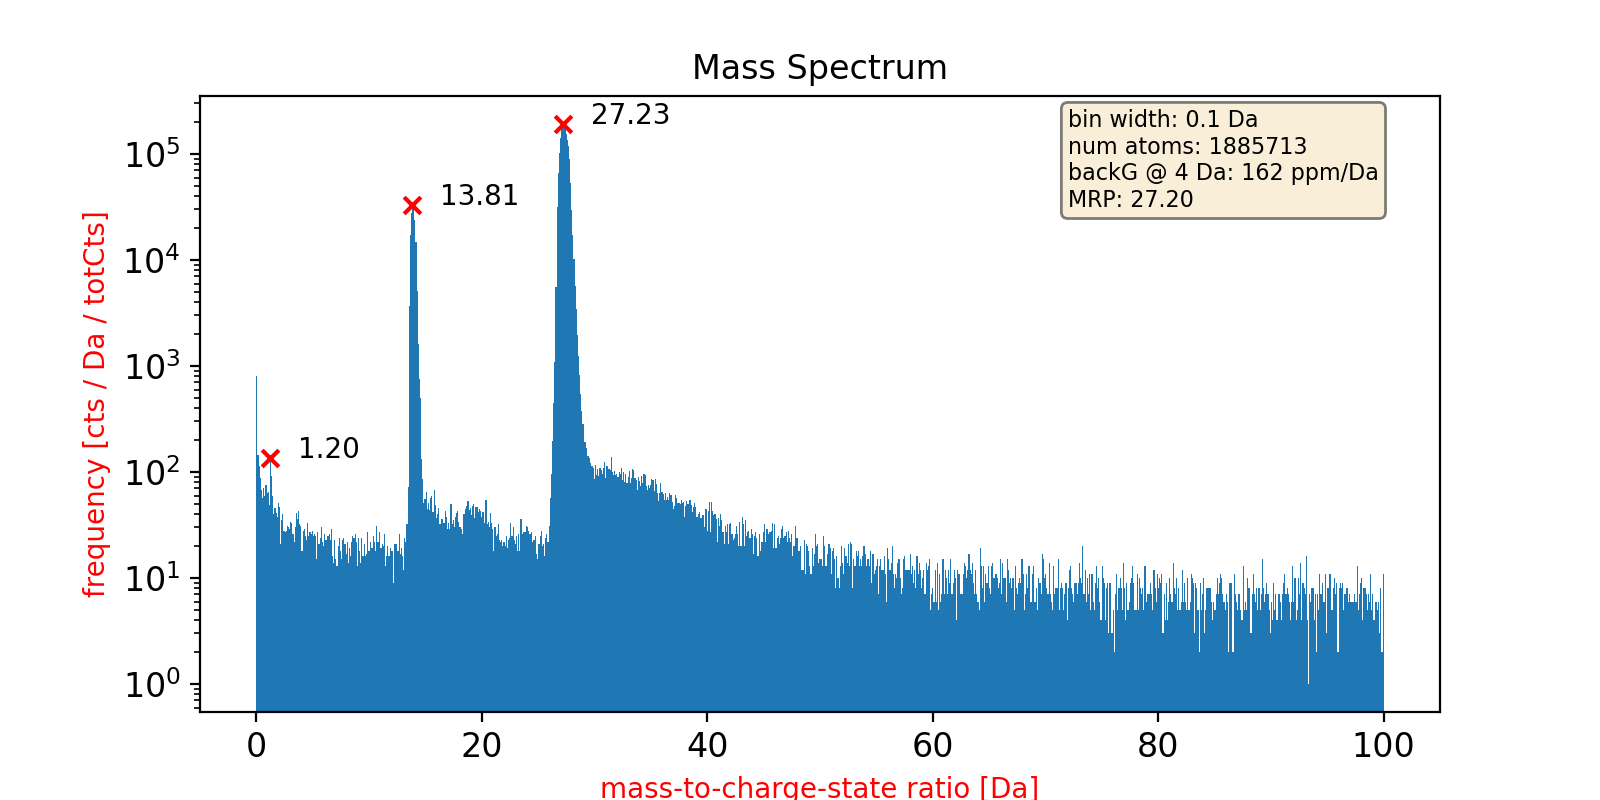

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [27.20000017]
Peaks  0 is: 1.20 peak window sides are: 1.10 - 1.40
Peaks  1 is: 13.81 peak window sides are: 13.51 - 14.11
Peaks  2 is: 27.23 peak window sides are: 26.73 - 27.73


In [64]:
mc_seb = mc_tools.tof2mc(dld_t, t0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, peaks_find=True, percent=50, prominence=30, distance=50, plot=True, text_loc='right', fig_name=figname)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

$\text{Details of selected peaks is displayed below:}$

In [67]:
print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

################ Before starting the colibration ################
Maximum pick value: [27.22577747] right-left side of the peak: [26.72530362 27.72625132]
Mass resolving power (MRP --> m/m_2-m_1): [27.20000017]
Peaks  0 is: 1.20 peak window sides are: 1.10 - 1.40
Peaks  1 is: 13.81 peak window sides are: 13.51 - 14.11
Peaks  2 is: 27.23 peak window sides are: 26.73 - 27.73
#################################################################


$\text{User can tune/specify parameters below as per their requirements}$

In [68]:
mc_temp = mc_seb
mean_t = 0.001  # 0.3 the threshold by user instead of total mean
mrp_final = 0
iteration = 0
break_i = 0
ionsPerFitSegment = int(len(dld_t) / 70) # choose by dividing the dataset to 70 segments
print('Ions fit per segment is:',  ionsPerFitSegment)

Ions fit per segment is: 27512


$\text{Computation voltage and bowl correction based on the user-provided parameters. The loop breaks if there is no improvment in MRP for 3 itrations}$

(array([34], dtype=int64),)
10-21-2022 11:36:44 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:44 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:44 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:44 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>


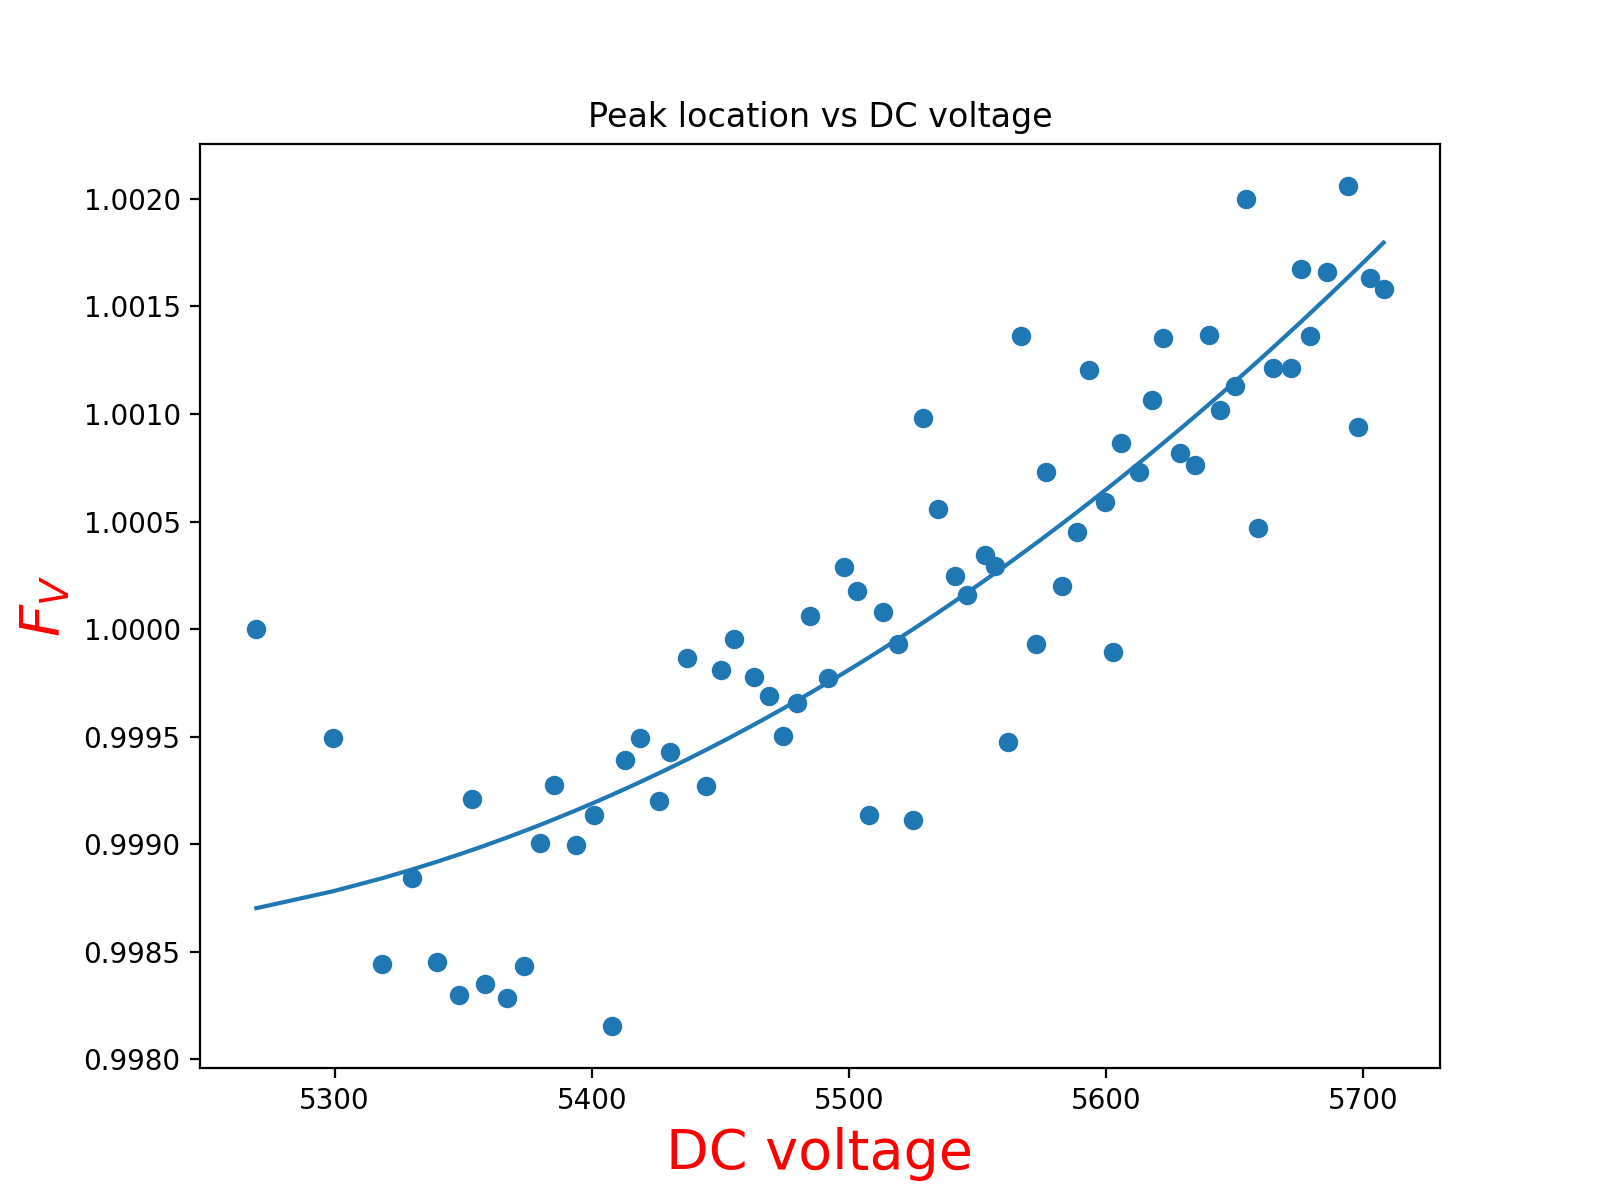

10-21-2022 11:36:46 | INFO | Selected Mode = count
10-21-2022 11:36:46 | INFO | Selected Mode = count
10-21-2022 11:36:46 | INFO | Selected Mode = count
10-21-2022 11:36:46 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


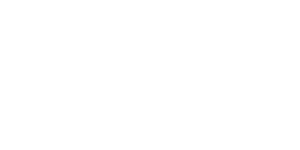

Iteration: 0 Voltage correction
Peaks in the 2D histogram [array([0.]), array([18.75])]
Maximum pick value: [27.22150057] right-left side of the peak: [26.72110535 27.7218958 ]
Mass resolving power (MRP --> m/m_2-m_1): [27.20000017]


<IPython.core.display.Javascript object>


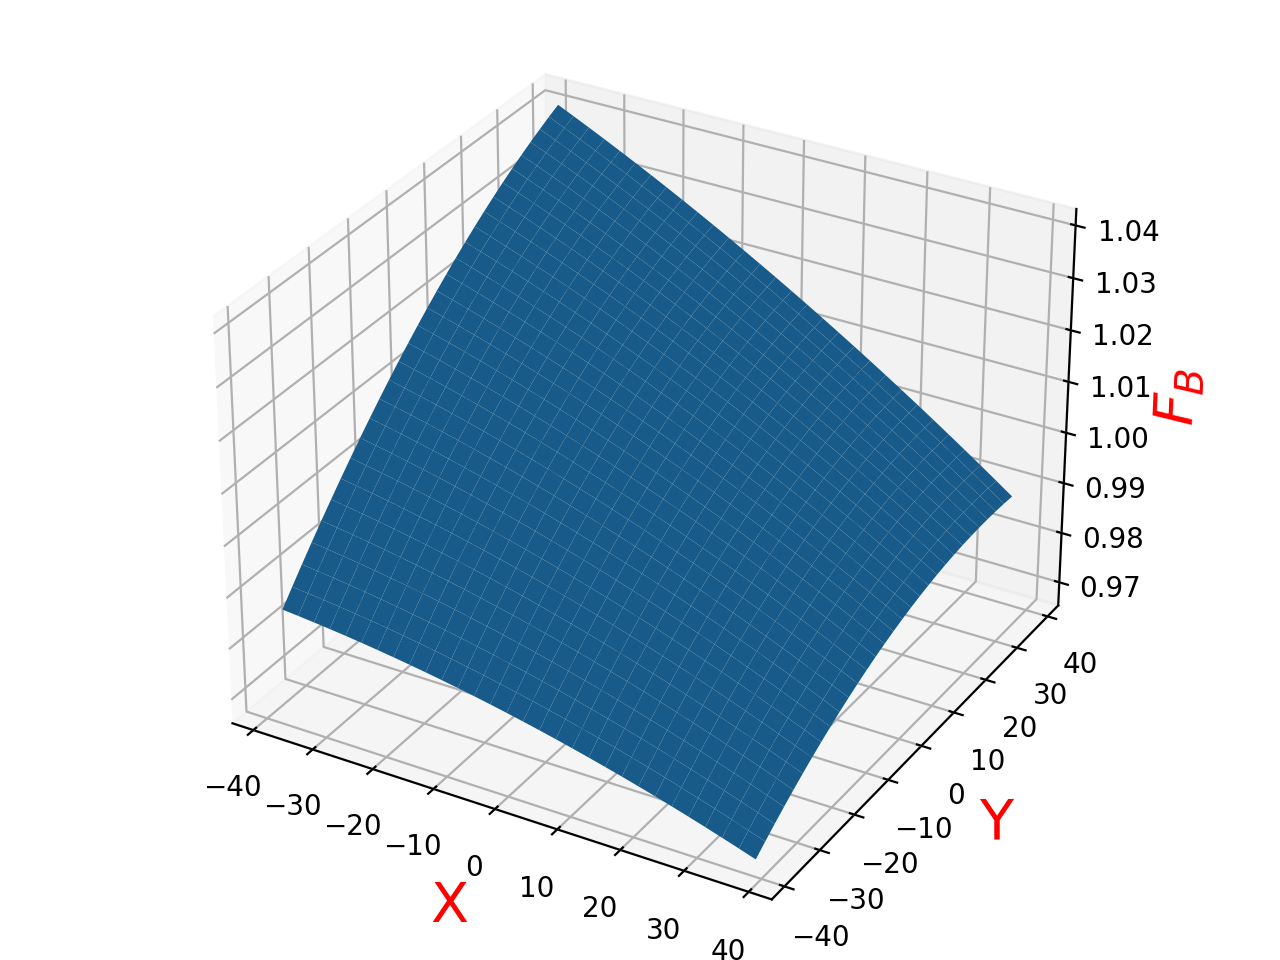

10-21-2022 11:36:49 | INFO | Selected Mode = count
10-21-2022 11:36:49 | INFO | Selected Mode = count
10-21-2022 11:36:49 | INFO | Selected Mode = count
10-21-2022 11:36:49 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


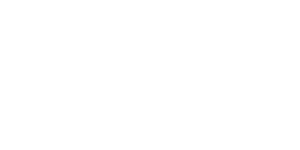

Iteration: 0 Bowl correction
Peaks in the 2D histogram [array([0.]), array([18.75])]
Maximum pick value: [27.12508414] right-left side of the peak: [26.92489901 27.2251767 ]
Mass resolving power (MRP --> m/m_2-m_1): [27.20000017]
(array([34], dtype=int64),)
10-21-2022 11:36:49 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:49 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:49 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:49 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>


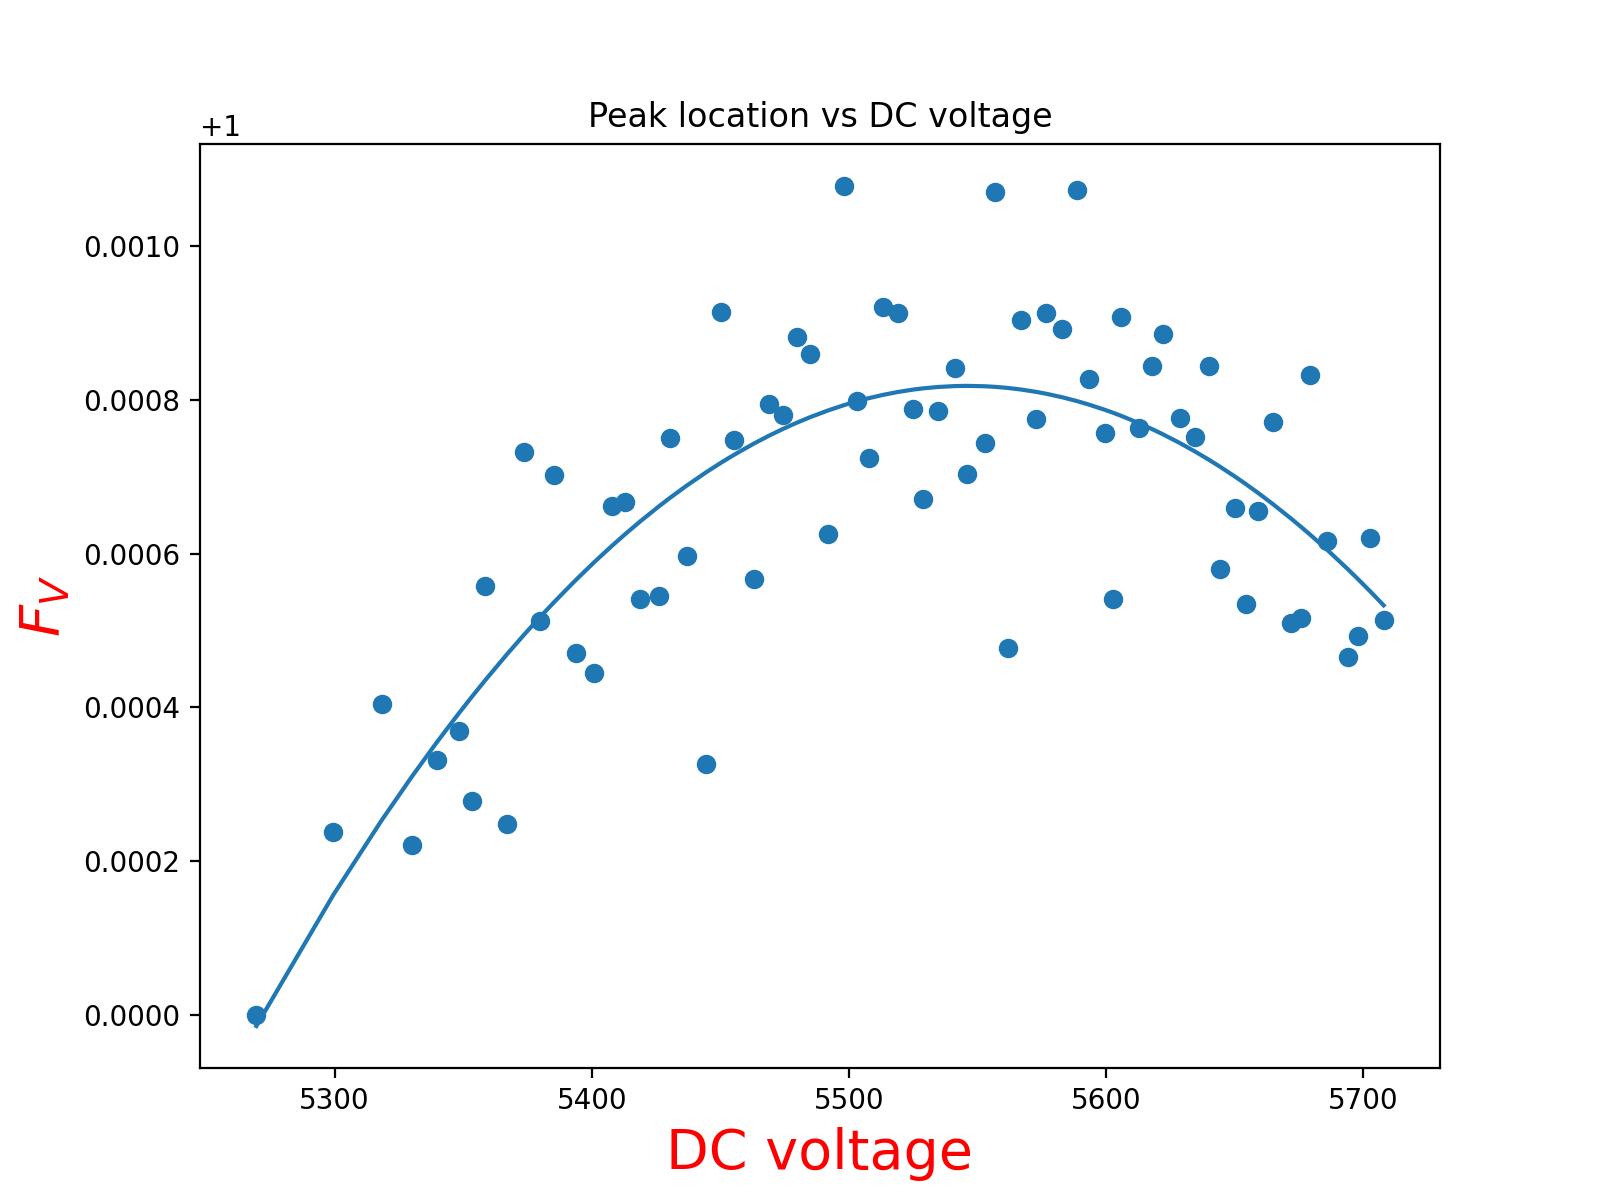

10-21-2022 11:36:50 | INFO | Selected Mode = count
10-21-2022 11:36:50 | INFO | Selected Mode = count
10-21-2022 11:36:50 | INFO | Selected Mode = count
10-21-2022 11:36:50 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


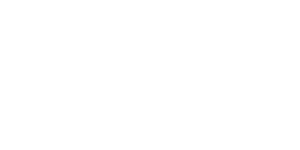

Iteration: 1 Voltage correction
Peaks in the 2D histogram [array([0.]), array([14.84375])]
Maximum pick value: [27.02324744] right-left side of the peak: [26.92316134 27.22341964]
Mass resolving power (MRP --> m/m_2-m_1): [90.00000056]


<IPython.core.display.Javascript object>


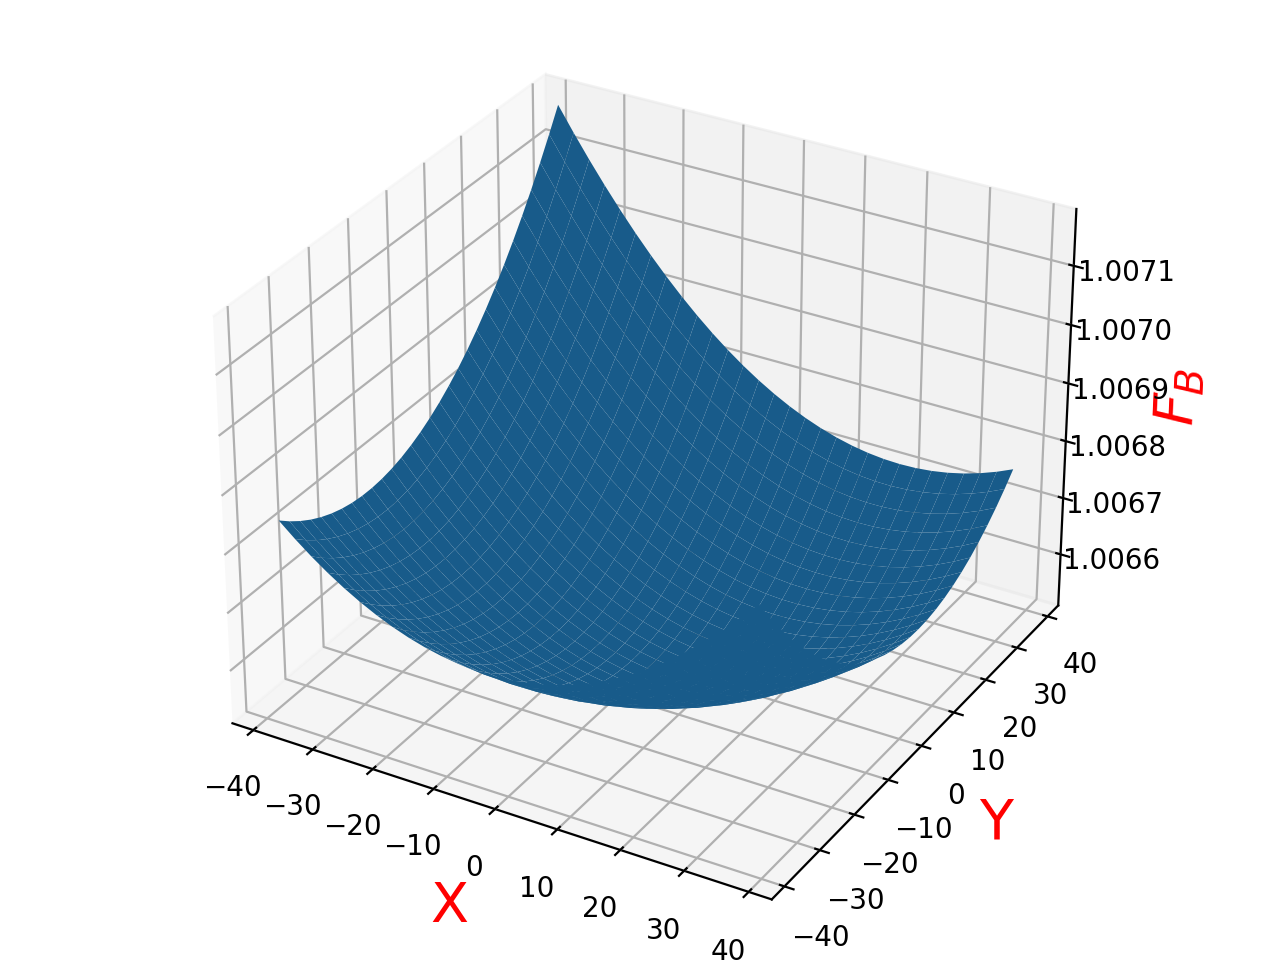

10-21-2022 11:36:53 | INFO | Selected Mode = count
10-21-2022 11:36:53 | INFO | Selected Mode = count
10-21-2022 11:36:53 | INFO | Selected Mode = count
10-21-2022 11:36:53 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


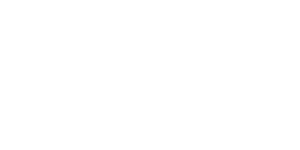

Iteration: 1 Bowl correction
Peaks in the 2D histogram [array([0.]), array([14.84375])]
Maximum pick value: [26.92296456] right-left side of the peak: [26.72279382 27.02304992]
Mass resolving power (MRP --> m/m_2-m_1): [90.00000056]
(array([34], dtype=int64),)
10-21-2022 11:36:53 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:53 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:53 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:53 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>


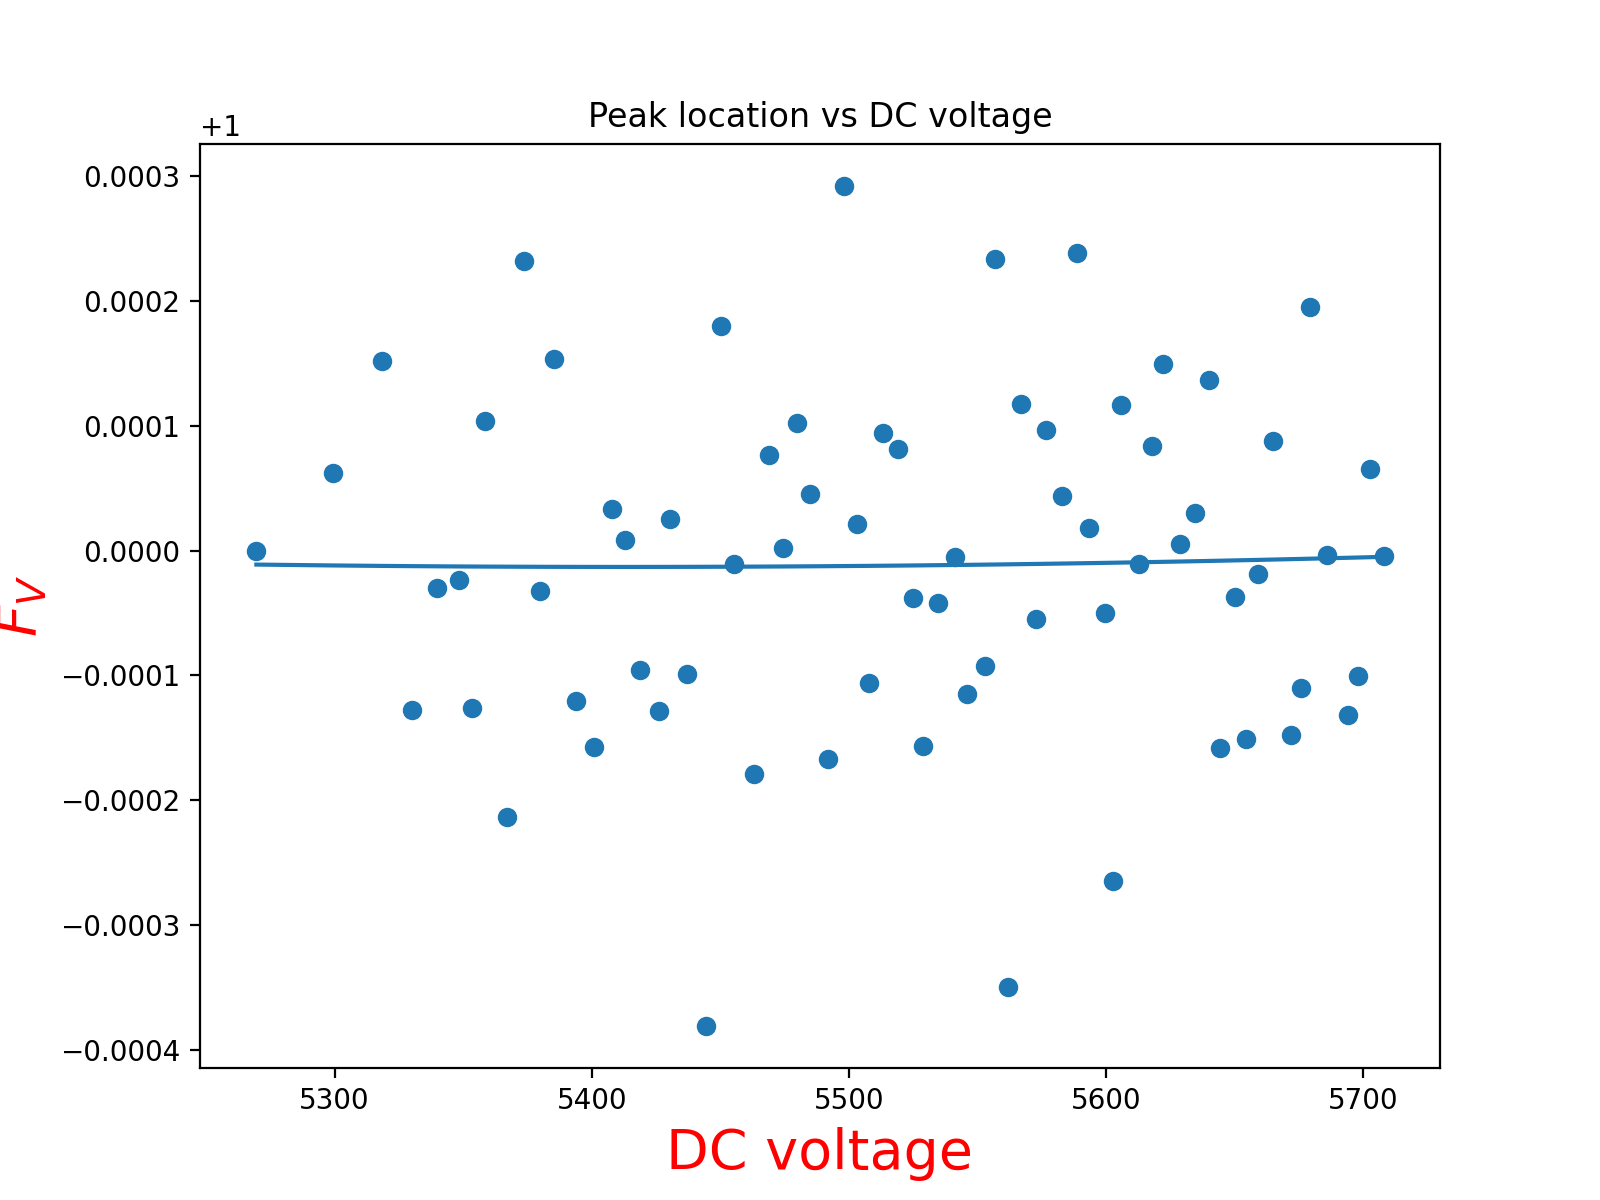

10-21-2022 11:36:54 | INFO | Selected Mode = count
10-21-2022 11:36:54 | INFO | Selected Mode = count
10-21-2022 11:36:54 | INFO | Selected Mode = count
10-21-2022 11:36:54 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


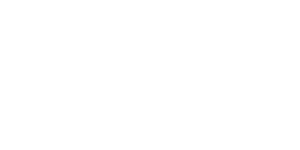

Iteration: 2 Voltage correction
Peaks in the 2D histogram [array([0.]), array([14.84375])]
Maximum pick value: [26.92331129] right-left side of the peak: [26.72313797 27.02339795]
Mass resolving power (MRP --> m/m_2-m_1): [89.66666722]


<IPython.core.display.Javascript object>


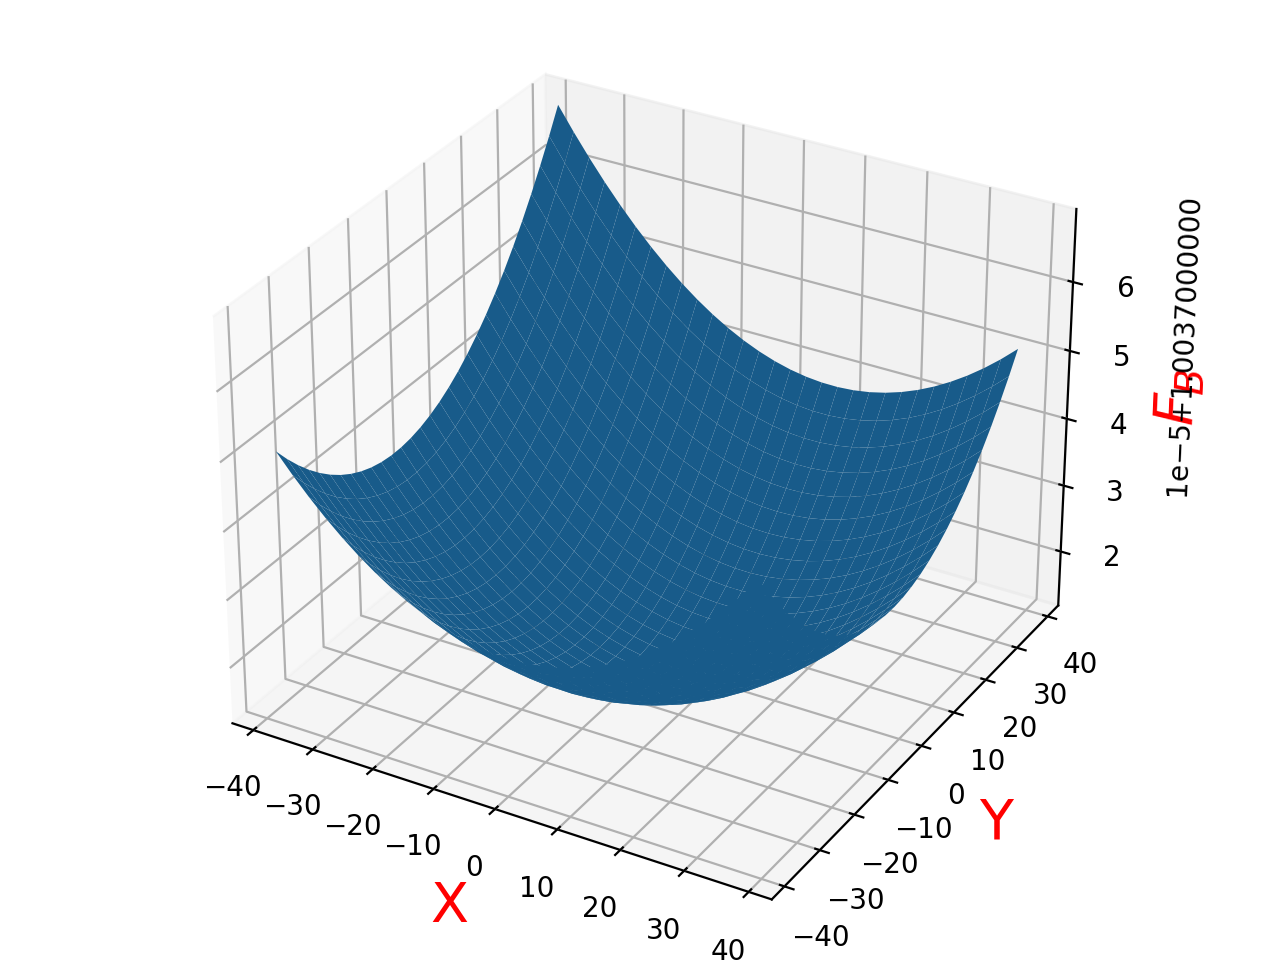

10-21-2022 11:36:57 | INFO | Selected Mode = count
10-21-2022 11:36:57 | INFO | Selected Mode = count
10-21-2022 11:36:57 | INFO | Selected Mode = count
10-21-2022 11:36:57 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


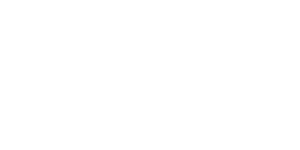

Iteration: 2 Bowl correction
Peaks in the 2D histogram [array([0.]), array([14.84375])]
Maximum pick value: [26.82468376] right-left side of the peak: [26.62449956 26.92477586]
Mass resolving power (MRP --> m/m_2-m_1): [89.66666722]
(array([34], dtype=int64),)
10-21-2022 11:36:57 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:57 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:57 | ERROR | Incorrect data type of passed arguments
10-21-2022 11:36:57 | ERROR | Incorrect data type of passed arguments


<IPython.core.display.Javascript object>


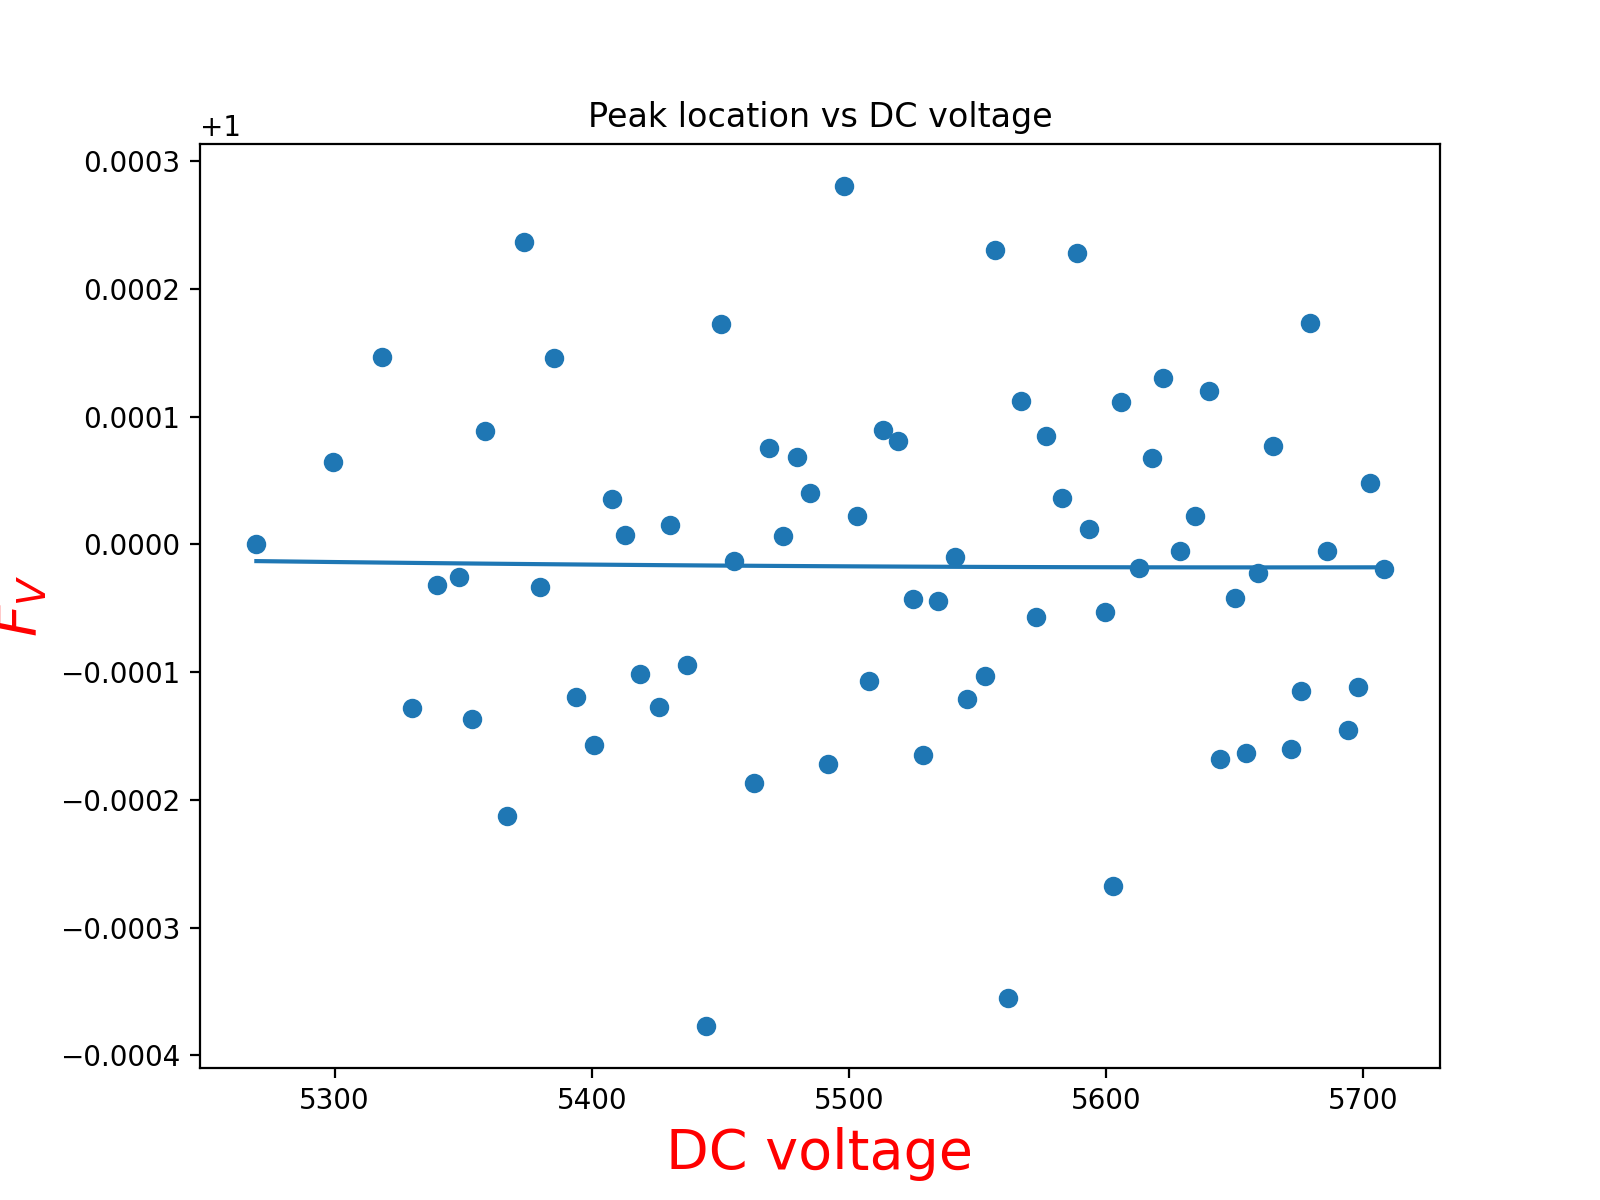

10-21-2022 11:36:59 | INFO | Selected Mode = count
10-21-2022 11:36:59 | INFO | Selected Mode = count
10-21-2022 11:36:59 | INFO | Selected Mode = count
10-21-2022 11:36:59 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


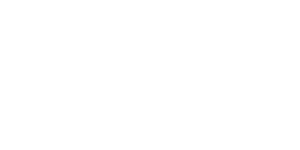

Iteration: 3 Voltage correction
Peaks in the 2D histogram [array([0.]), array([14.6484375])]
Maximum pick value: [26.82516595] right-left side of the peak: [26.62497814 26.92525985]
Mass resolving power (MRP --> m/m_2-m_1): [89.33333389]


<IPython.core.display.Javascript object>


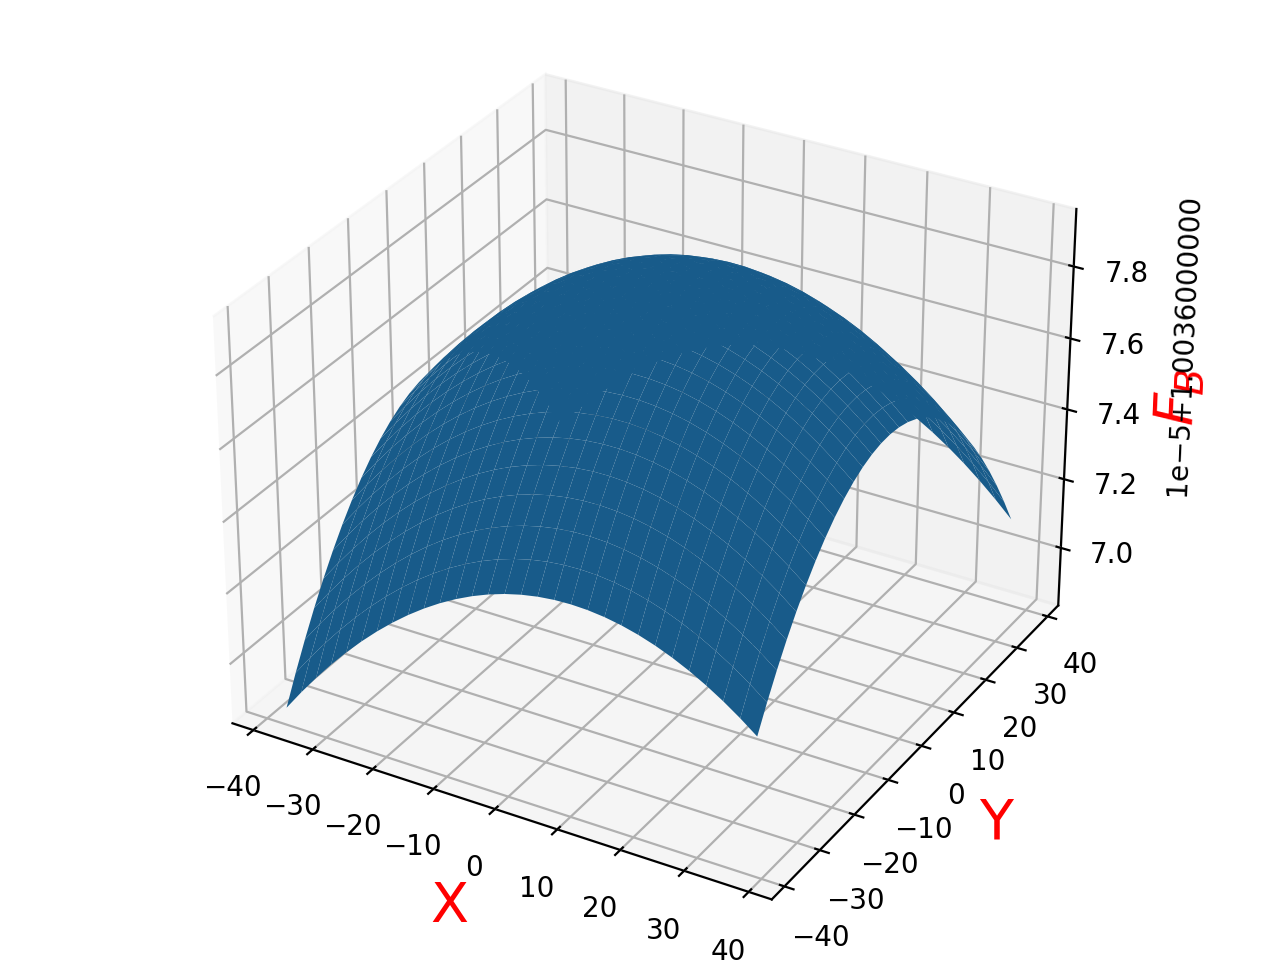

10-21-2022 11:37:01 | INFO | Selected Mode = count
10-21-2022 11:37:01 | INFO | Selected Mode = count
10-21-2022 11:37:01 | INFO | Selected Mode = count
10-21-2022 11:37:01 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


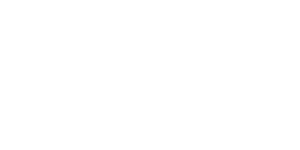

Iteration: 3 Bowl correction
Peaks in the 2D histogram [array([0.]), array([14.6484375])]
Maximum pick value: [26.73651569] right-left side of the peak: [26.53624216 26.83665245]
Mass resolving power (MRP --> m/m_2-m_1): [89.33333389]


In [69]:
while True:
    fitPeak = tools.history_ex(mc_temp, dld_highVoltage, mean_t,mc_max=400, plot=False)
    corrFac_voltage = tools.voltage_corr(dld_highVoltage, mc_temp, fitPeak, ionsPerFitSegment, plot=True, fig_name='%s_'%break_i + figname)
    mc_temp2 = mc_temp / corrFac_voltage
    max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_temp2[mc_temp2 < 100], 0.1, plot=False)
    mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp2
    print('Iteration:', iteration, 'Voltage correction')
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    corrFac_bowl = tools.bowl_corr(dld_x, dld_y, mc_temp2, mcIdeal=max_hist, mc_min=max_paek_edges[0], mc_max=max_paek_edges[1], plot=True, fig_name='%s_'%break_i + figname)
    mc_temp3 = mc_temp2 / corrFac_bowl
    max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_temp3[mc_temp3 < 100], 0.1, plot=False)
    mc_temp = mc_temp3
    
    print('Iteration:', iteration, 'Bowl correction')
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp
    else:
        if break_i == 3:
            break
        break_i += 1

    iteration += 1


$\text{Peak the peaks that you want to use for linear correcction by slecting the red cross on top of the peak}$

10-21-2022 11:38:57 | INFO | Selected Mode = count
10-21-2022 11:38:57 | INFO | Selected Mode = count
10-21-2022 11:38:57 | INFO | Selected Mode = count
10-21-2022 11:38:57 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


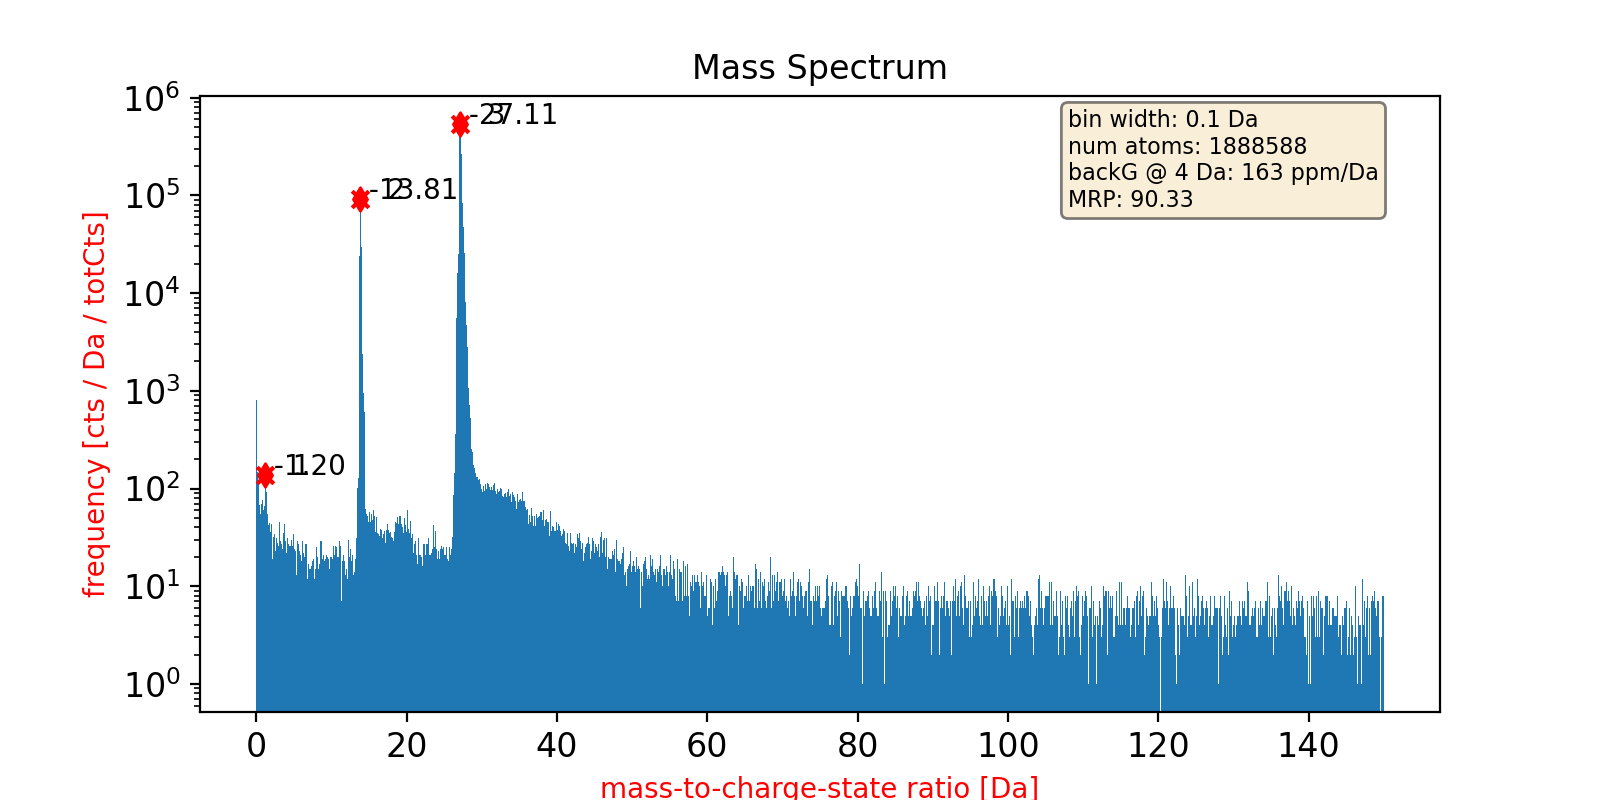

In [70]:
variables.peaks_idx = []
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_f[mc_f < 150], 0.1, plot=True, prominence=70, distance=20,fig_name='cor_'+figname, text_loc='right')

In [72]:
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]))

Peaks  0 is: 1.20
Peaks  1 is: 13.81
Peaks  2 is: 27.11


$\text{Here we should choose the m/c for the selected above peak}$

In [73]:
isotopeTableFile = '../../../files/isotopeTable.h5'
dataframe = data_tools.read_hdf5_through_pandas(isotopeTableFile)
elementsList = dataframe['element']
elementIsotopeList = dataframe['isotope']
elementMassList =  dataframe['weight']
abundanceList = dataframe['abundance']

elements = list(zip(elementsList,elementIsotopeList,elementMassList,abundanceList))
dropdownList = []
for element in elements:
    tupleElement = ("{} ({}) ({:.2f})".format(element[0],element[1],element[3]),element[2],)
    dropdownList.append(tupleElement)

chargeList = [(1,1,),(2,2,),(3,3,),(4,4,)]
dropdown = wd.dropdownWidget(dropdownList,"Elements")
dropdown.observe(wd.on_change)


chargeDropdown = wd.dropdownWidget(chargeList,"Charge")
chargeDropdown.observe(wd.on_change_charge)

wd.compute_element_isotope_values_according_to_selected_charge()

buttonAdd = wd.buttonWidget("ADD")
buttonDelete = wd.buttonWidget("DELETE")
buttonReset = wd.buttonWidget("RESET")

display(dropdown)
display(chargeDropdown)
display(buttonAdd)
display(buttonDelete)
display(buttonReset)
listMaterial = buttonAdd.on_click(wd.onClickAdd)
buttonDelete.on_click(wd.onClickDelete)
buttonReset.on_click(wd.onClickReset)

Dropdown(description='Elements', options=(('H (1) (99.98)', 1.01), ('H (2) (0.01)', 2.01), ('He (3) (0.00)', 3…

Dropdown(description='Charge', options=((1, 1), (2, 2), (3, 3), (4, 4)), value=1)

Button(description='ADD', icon='check', style=ButtonStyle(), tooltip='ADD')

Button(description='DELETE', icon='check', style=ButtonStyle(), tooltip='DELETE')

Button(description='RESET', icon='check', style=ButtonStyle(), tooltip='RESET')

In [74]:
peaks_chos = []
for i in range(len(variables.peaks_idx)):
    peaks_chos.append(peaks_sides[variables.peaks_idx[i],0])
peaks_chos = np.array(peaks_chos)
listMaterial = np.array(listMaterial)
print('highest peak in the mc histogram:', peaks_chos)
print('highest peak in the ideal mc histogram:', variables.listMaterial)

highest peak in the mc histogram: [ 1.20054918 13.80631386 27.11239879]
highest peak in the ideal mc histogram: [1.01, 13.49, 26.98]


$\text{Above you should see the selected peak values and the ideal m/c for them seperatly. By runing the below cell linear correction aplies on the m/c and the final result is plotted}$

In [75]:
# For quadratic you need at least 3 points
mc_final = tools.linear_correction(mc_f, peaks_chos, np.array(variables.listMaterial), kind='linear')

[0.84128165 0.97708919 0.99511667]


10-21-2022 11:39:39 | INFO | Selected Mode = count
10-21-2022 11:39:39 | INFO | Selected Mode = count
10-21-2022 11:39:39 | INFO | Selected Mode = count
10-21-2022 11:39:39 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


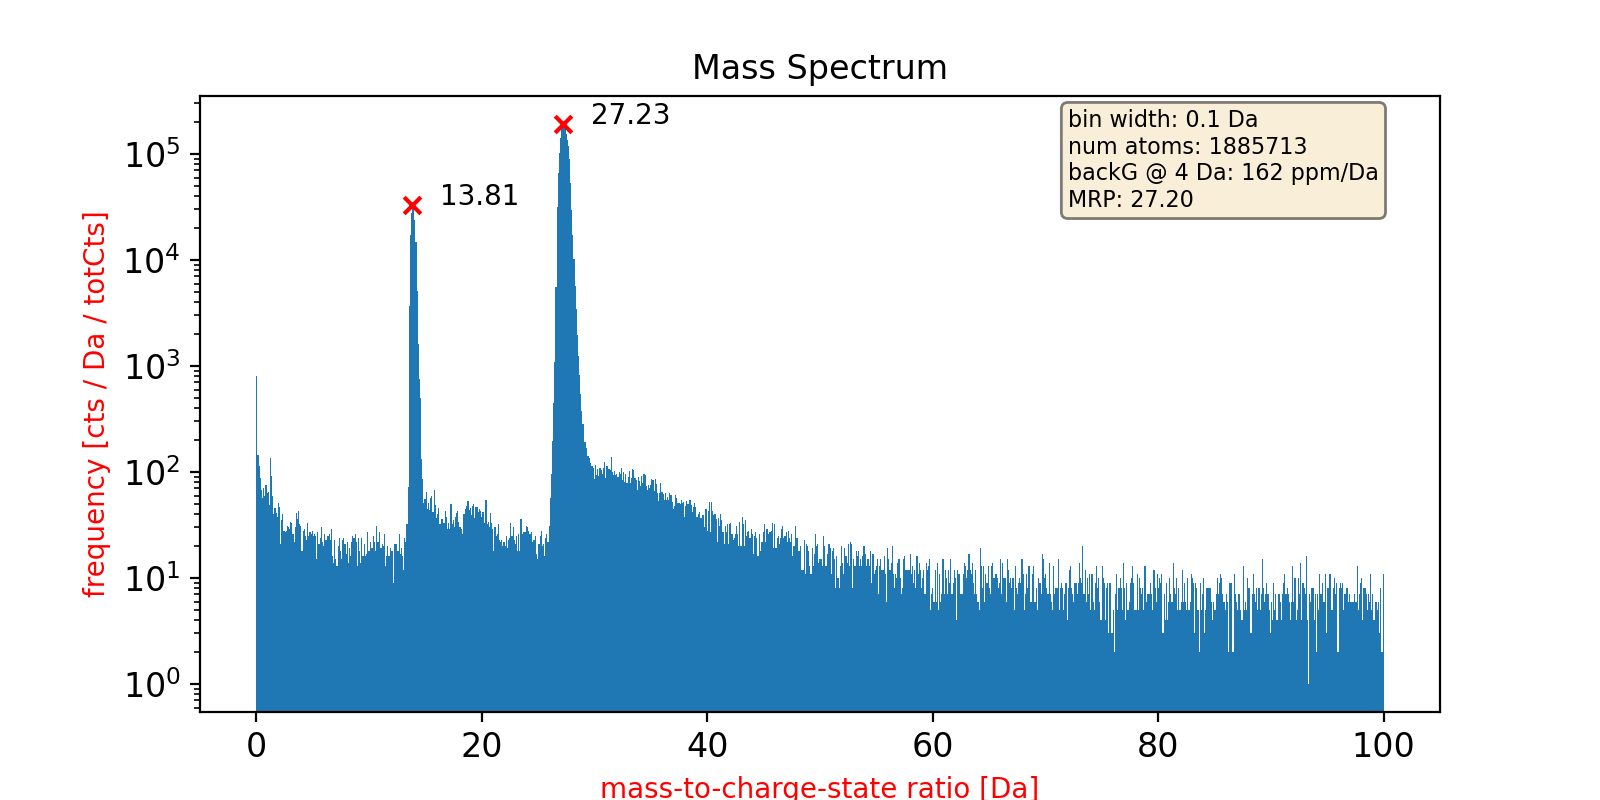

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [27.20000017]
10-21-2022 11:39:39 | INFO | Selected Mode = count
10-21-2022 11:39:39 | INFO | Selected Mode = count
10-21-2022 11:39:39 | INFO | Selected Mode = count
10-21-2022 11:39:39 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


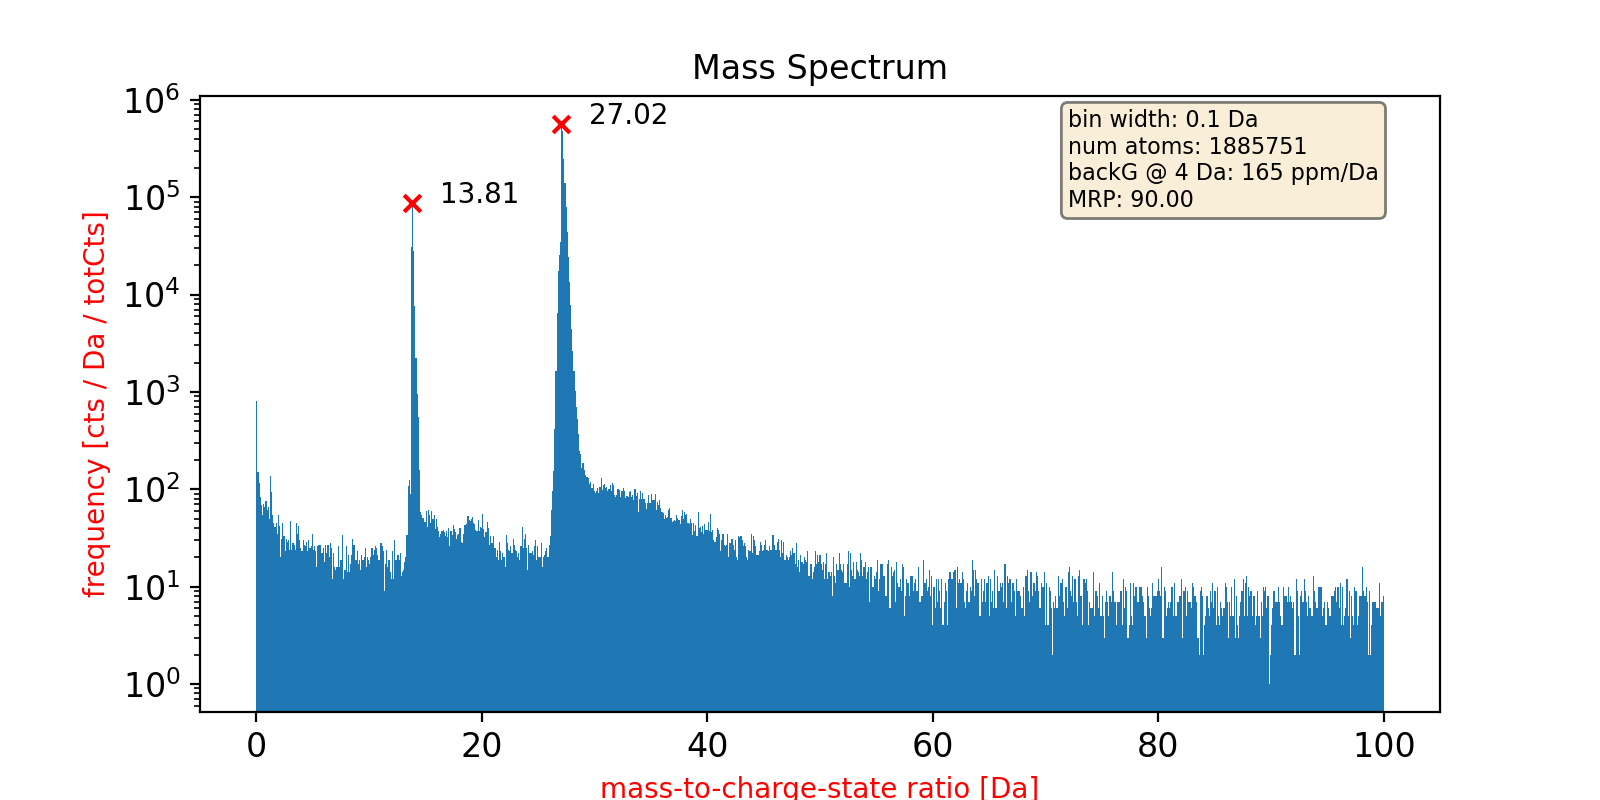

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [90.00000056]
10-21-2022 11:39:40 | INFO | Selected Mode = count
10-21-2022 11:39:40 | INFO | Selected Mode = count
10-21-2022 11:39:40 | INFO | Selected Mode = count
10-21-2022 11:39:40 | INFO | Selected Mode = count


<IPython.core.display.Javascript object>


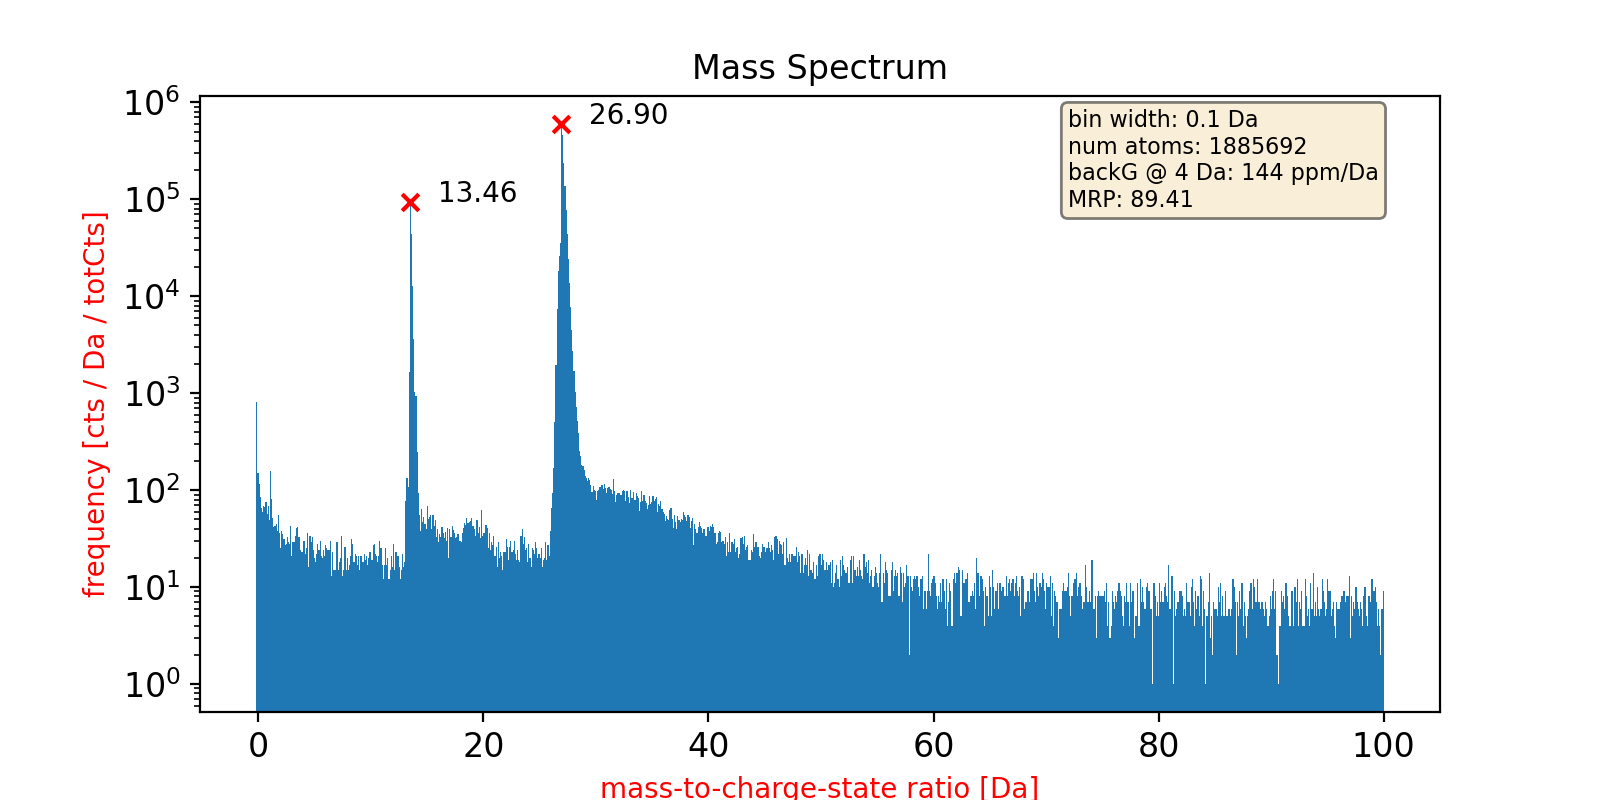

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [89.40639654]


In [76]:
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, plot=True)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max  = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=800, fig_name=None, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max  = tools.massSpecPlot(mc_final[mc_final < 100], 0.1, plot=True, prominence=800, fig_name='linear_cor_'+figname, text_loc='right', peaks_find_plot=True)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)

In [77]:
data['mc (Da)'] = mc_final

In [78]:
data

high_voltage (V)    pulse (V)  start_counter      t (ns)     x (mm)  \
0             5239.389648  5239.389648        20476.0  626.265702   5.762449   
1             5239.389648  5239.389648        21274.0  648.087858 -11.206531   
2             5239.389648  5239.389648        22584.0  639.583938  24.259592   
3             5239.389648  5239.389648        22746.0  627.959628  18.083265   
4             5239.389648  5239.389648        23789.0  623.357910  -1.942041   
...                   ...          ...            ...         ...        ...   
1925867       5710.397949  5710.397949        19724.0  609.401880 -15.886531   
1925868       5710.397949  5710.397949        19742.0  601.796358  11.397551   
1925869       5710.397949  5710.397949        19969.0  455.220324  31.008980   
1925870       5710.397949  5710.397949        20649.0  611.857044   2.483265   
1925871       5710.397949  5710.397949        20774.0  625.435884  34.924898   

            y (mm)  pulse_pi  ion_pp    mc (Da)  
0         4.329796       0.0     1.0  27.218284  
1        26.902041     798.0     1.0  27.034123  
2        15.504490    1310.0     1.0  26.974537  
3        -7.545306     162.0     1.0  26.961213  
4        -2.706122    1043.0     1.0  27.022295  
...            ...       ...     ...        ...  
1925867  -9.742041      77.0     1.0  27.135190  
1925868  -5.475918      18.0     1.0  27.043512  
1925869  -1.719184     227.0     1.0  13.531066  
1925870 -27.284082     680.0     1.0  27.020842  
1925871  11.620408     125.0     1.0  27.019774  

[1925872 rows x 9 columns]

In [ ]:
name_save_file = variables.result_path + '//' + dataset_name + '.h5'
data_tools.store_df_to_hdf(name_save_file, data, 'df')